In [26]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
# Train and CV-score model for each combination
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [3]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

linreg = LinearRegression().fit(X, y)
ridge = Ridge(alpha=0.2).fit(X, y)
lasso = Lasso(alpha=0.2).fit(X, y)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_linreg,coef_ridge,coef_lasso
age,-10,7,0
sex,-239,-182,-75
bmi,519,457,511
bp,324,284,234
s1,-792,-48,0
s2,476,-78,0
s3,101,-189,-170
s4,177,119,0
s5,751,400,450
s6,67,97,0


In [4]:
linreg = LinearRegression().fit(X, y)
ridge = Ridge(alpha=0.6).fit(X, y)
lasso = Lasso(alpha=0.6).fit(X, y)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_linreg,coef_ridge,coef_lasso
age,-10,22,0
sex,-239,-118,0
bmi,519,364,454
bp,324,234,109
s1,-792,-9,0
s2,476,-51,0
s3,101,-169,-31
s4,177,121,0
s5,751,311,392
s6,67,112,0


In [5]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1, l1_ratio=0.2)

In [7]:
model.fit(X, y)

ElasticNet(alpha=1, l1_ratio=0.2)

In [12]:
pd.DataFrame(model.sparse_coef_)

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [6]:
import statsmodels.api as sm

ols = sm.OLS(y, sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.83e-62
Time:                        09:45:59   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [15]:
!pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [20]:
list(hyperparams)

[(0.01, 0.2),
 (0.01, 0.5),
 (0.01, 0.8),
 (0.1, 0.2),
 (0.1, 0.5),
 (0.1, 0.8),
 (1, 0.2),
 (1, 0.5),
 (1, 0.8)]

In [18]:
# Select hyperparam values to try

alphas = [0.01, 0.1, 1] # L1 + L2 
l1_ratios = [0.2, 0.5, 0.8] # L1 / L2 ratio

# create all combinations [(0.01, 0.2), (0.01, 0.5), (...)]
import itertools
hyperparams = itertools.product(alphas, l1_ratios) 

In [10]:


for hyperparam in hyperparams:
    alpha = hyperparam[0]
    l1_ratio = hyperparam[1]

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    r2 = cross_val_score(model, X_train, y_train, cv=5).mean()

    print(f"alpha: {alpha}, l1_ratio: {l1_ratio},   r2: {r2}")

alpha: 0.01, l1_ratio: 0.2,   r2: 0.3097093011229858
alpha: 0.01, l1_ratio: 0.5,   r2: 0.36553389455838525
alpha: 0.01, l1_ratio: 0.8,   r2: 0.44169590096847544
alpha: 0.1, l1_ratio: 0.2,   r2: 0.0460745278512346
alpha: 0.1, l1_ratio: 0.5,   r2: 0.08029085880552811
alpha: 0.1, l1_ratio: 0.8,   r2: 0.17781841389792175
alpha: 1, l1_ratio: 0.2,   r2: -0.021420175696800325
alpha: 1, l1_ratio: 0.5,   r2: -0.019482185329917502
alpha: 1, l1_ratio: 0.8,   r2: -0.0114266833108428


In [21]:
from sklearn.model_selection import GridSearchCV

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Instantiate model
model = ElasticNet()

# Hyperparameter Grid
grid = {
    'alpha': [0.01, 0.1, 1], 
    'l1_ratio': [0.2, 0.5, 0.8]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid, 
    scoring = 'r2',
    cv = 5,
    n_jobs=-1 # parallelize computation
) 

# Fit data to Grid Search
search.fit(X_train, y_train);

In [23]:
# Best score
search.best_score_

# Best Params
search.best_params_

# Best estimator
# search.best_estimator_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [13]:
search.best_score_

0.44169590096847544

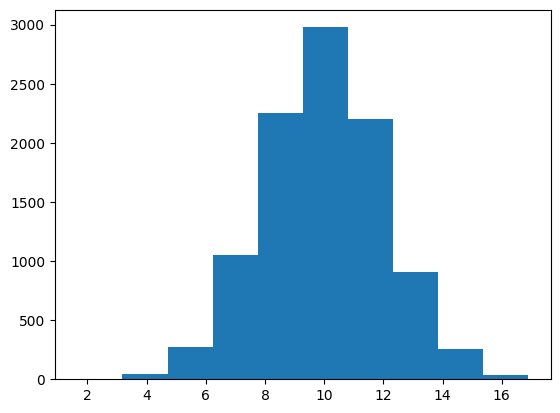

In [31]:
# dist = stats.uniform(1, 100) # same

dist = stats.norm(10, 2) # Coarse grain search

r = dist.rvs(size=10000) # Random draws
plt.hist(r);

In [14]:
search.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Instantiate model
model = ElasticNet()

# Hyperparameter Grid
grid = {'l1_ratio': stats.uniform(0, 1), 'alpha': [0.001, 0.01, 0.1, 1]}

# Instantiate Grid Search
search = RandomizedSearchCV(
    model,
    grid, 
    scoring='r2',
    n_iter=100,  # number of draws
    cv=5, n_jobs=-1
)

# Fit data to Grid Search
search.fit(X_train, y_train)
search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.752759944120145)

In [27]:
model = ElasticNet(alpha=0.001, l1_ratio=0.752759944120145)

r2 = cross_val_score(model, X_train, y_train, cv=5).mean()
r2

0.4814836260094628

In [32]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=10)

# equivalent but with SGD solver
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

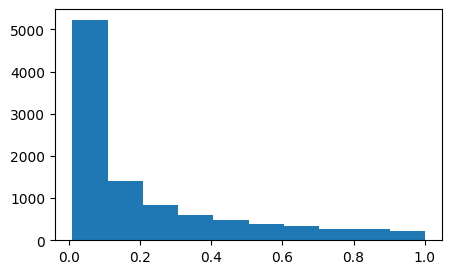

In [18]:
from scipy import stats

plt.figure(figsize=(5, 3))

dist = stats.norm(10, 2) # if you have a best guess (say: 10)

dist = stats.randint(1,100) # if you have no idea
dist = stats.uniform(1, 100) # same

dist = stats.loguniform(0.01, 1) # Coarse grain search

r = dist.rvs(size=10000) # Random draws
plt.hist(r);